
## Problem Statement:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Content

For more information

Input variables (based on physicochemical tests):
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur 
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol

### Importing Libraries

In [616]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc,roc_auc_score,roc_curve,plot_roc_curve
from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings("ignore")

In [617]:
data=pd.read_csv("https://raw.githubusercontent.com/manoj290/DataTrained-Practice/main/Practice_phase/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [618]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

1.fixed acidity::most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2.volatile acidity::the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3.citric acid::found in small quantities, citric acid can add 'freshness' and flavor to wines.

4.residual sugar:the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.

5.chlorides::the amount of salt in the wine.

6.free sulfur dioxide::the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.

7.total sulfur dioxide::amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

8.density::the density of water is close to that of water depending on the percent alcohol and sugar content.

9.pH::describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

10.sulphates::a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

11.alcohol::the percent alcohol content of the wine.

12.quality:: it is quality of wine i.e. our label more high the value more the quality of wine is good.

In [619]:
data.shape

(1599, 12)

The data set contains 1599 no. records & 12 columns.

In [620]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Only Quality columns contains the integer type value that is our label & and all other column are features that are of Decimal type.

In [621]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Here we can see that there are no null values in the data.

## trasforming target column 

In [622]:
data['qy']=0 
data.loc[data['quality']>6,'qy']=1
data['quality']=data['qy']
data.drop('qy',axis=1,inplace=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0


Here we transformes quality column in classes 0 & 1. where 0 is the column in which the quality range from 3-6 exists & 1 is the quality for 7 & 8.

## EDA

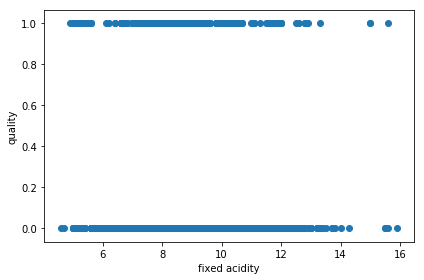

In [623]:
plt.scatter(data['fixed acidity'],data['quality'])
plt.xlabel('fixed acidity')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that fixed acidity may have some outliers and for range fixed acidity > 14 is continous data.

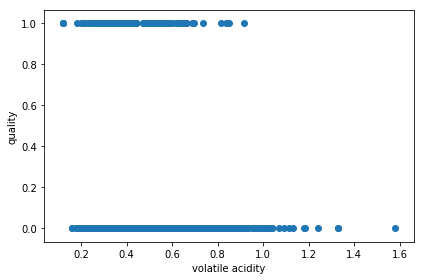

In [624]:
plt.scatter(data['volatile acidity'],data['quality'])
plt.xlabel('volatile acidity')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the data is continous within range 0.2 to 1.1 for quality class 0 but for quality class 1 it seems less acidity. Ans it seem to have some outliers too in it.

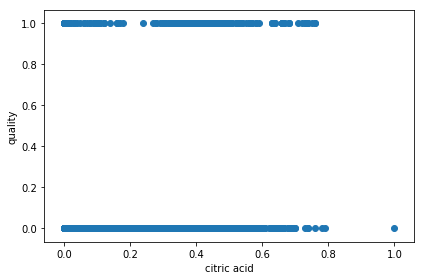

In [625]:
plt.scatter(data['citric acid'],data['quality'])
plt.xlabel('citric acid')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the citric acid column  is continous within range 0.0 to 0.8. And it seems to have some outliers too in it.

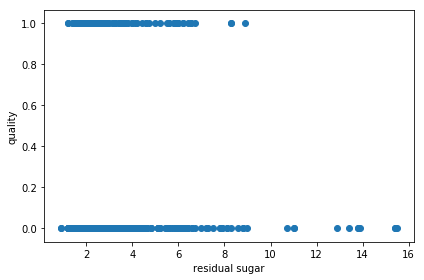

In [626]:
plt.scatter(data['residual sugar'],data['quality'])
plt.xlabel('residual sugar')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the residual sugar column  is continous within range 2 to 9. And it seems to have some outliers too in it.

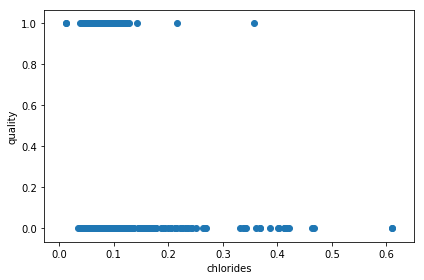

In [627]:
plt.scatter(data['chlorides'],data['quality'])
plt.xlabel('chlorides')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the chlorides column  is continous within range 0.0 to 0.28. And it seems to have some outliers too in it.

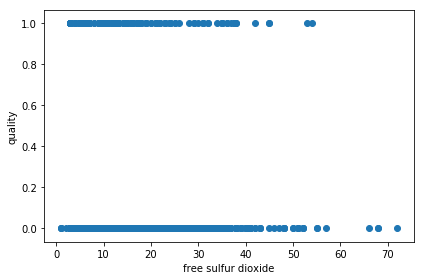

In [628]:
plt.scatter(data['free sulfur dioxide'],data['quality'])
plt.xlabel('free sulfur dioxide')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the free SO2 column  is continous within range 0 to 50. And it seems to have some outliers too in it. 

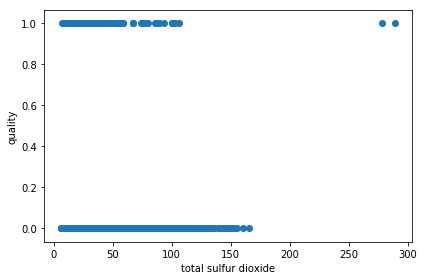

In [629]:
plt.scatter(data['total sulfur dioxide'],data['quality'])
plt.xlabel('total sulfur dioxide')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the total SO2 column  is continous within range 0 to 170. And it seems to have some outliers too in it for qualityclass 1.

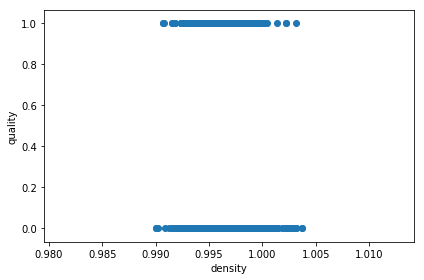

In [630]:
plt.scatter(data['density'],data['quality'])
plt.xlabel('density')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the density column  is continous within range 0.990 to 1.005 for both classes of quality column.

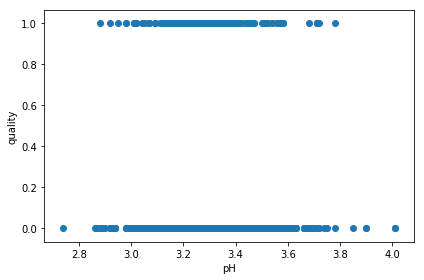

In [631]:
plt.scatter(data['pH'],data['quality'])
plt.xlabel('pH')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the pH column  is continous within range 2.8 to 3.8. And it seems to have some outliers too in it.

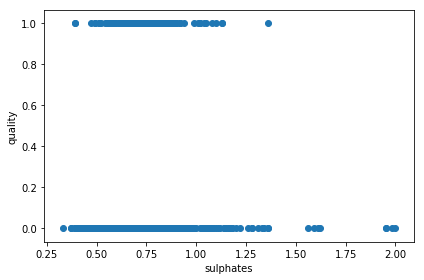

In [632]:
plt.scatter(data['sulphates'],data['quality'])
plt.xlabel('sulphates')
plt.ylabel("quality")
plt.tight_layout()

Here the data is continous and have outliers too.

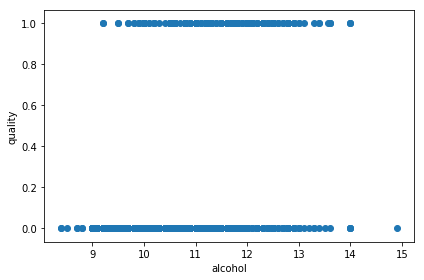

In [633]:
plt.scatter(data['alcohol'],data['quality'])
plt.xlabel('alcohol')
plt.ylabel("quality")
plt.tight_layout()

Here the data is continous for range 8 to 14.

### Checking Data Distribution

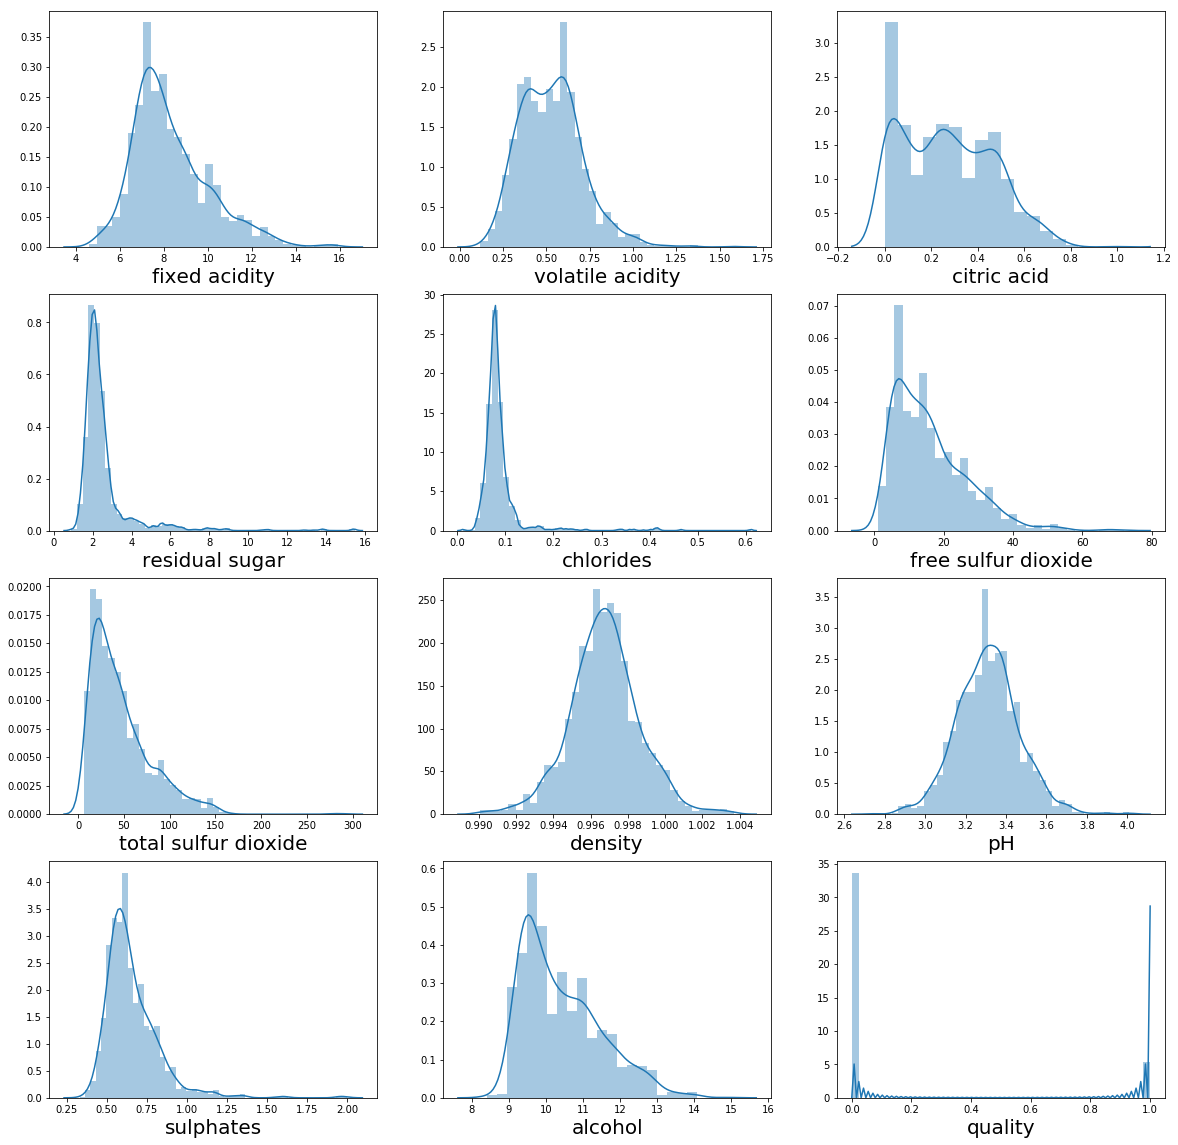

In [634]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

from the above graph:

    Graph1:
    
        In this the 'fixed acidity' column that is continous is seems to be skewed.
        
    Graph2:
    
        In this the 'volatile acidity' column i.e. continous column is not normally distributed.
        
    Graph3:
    
        In this the 'citric acid' column  it seems to be that data is  normally distributed.
        
    Graph4:
    
        In this the 'residual sugar' column the data is highly skewed.
        
    Graph5:
    
        In this the 'chlorides' column the data is highly skewed.
        
    Graph6:
    
        In this column i.e. 'free sulfur dioxide' is not Normally Distributed or skewed.
        
    Graph7:
    
        In this column i.e. 'total sulfur dioxide' is not Normally Distributed or skewed.
        
    Graph8:
    
        In this column i.e. density is  normally distributed
        
    Graph9:
    
        In this column i.e. 'pH't is  normally distributed
        
    Graph 10:
    
        In this column i.e. 'sulphates' is not normally distributed
        
    Graph 11:
    
        In this column i.e. 'alcohol' is not normally distributed

In [635]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

As the columns:

    1. between range 0.5 to -0.5 that are 'citric acis', 'density', 'pH' are not skewed.
    
    2. all other columns are not symmetric they are highly/moderate skewed.

### Checking for Outliers

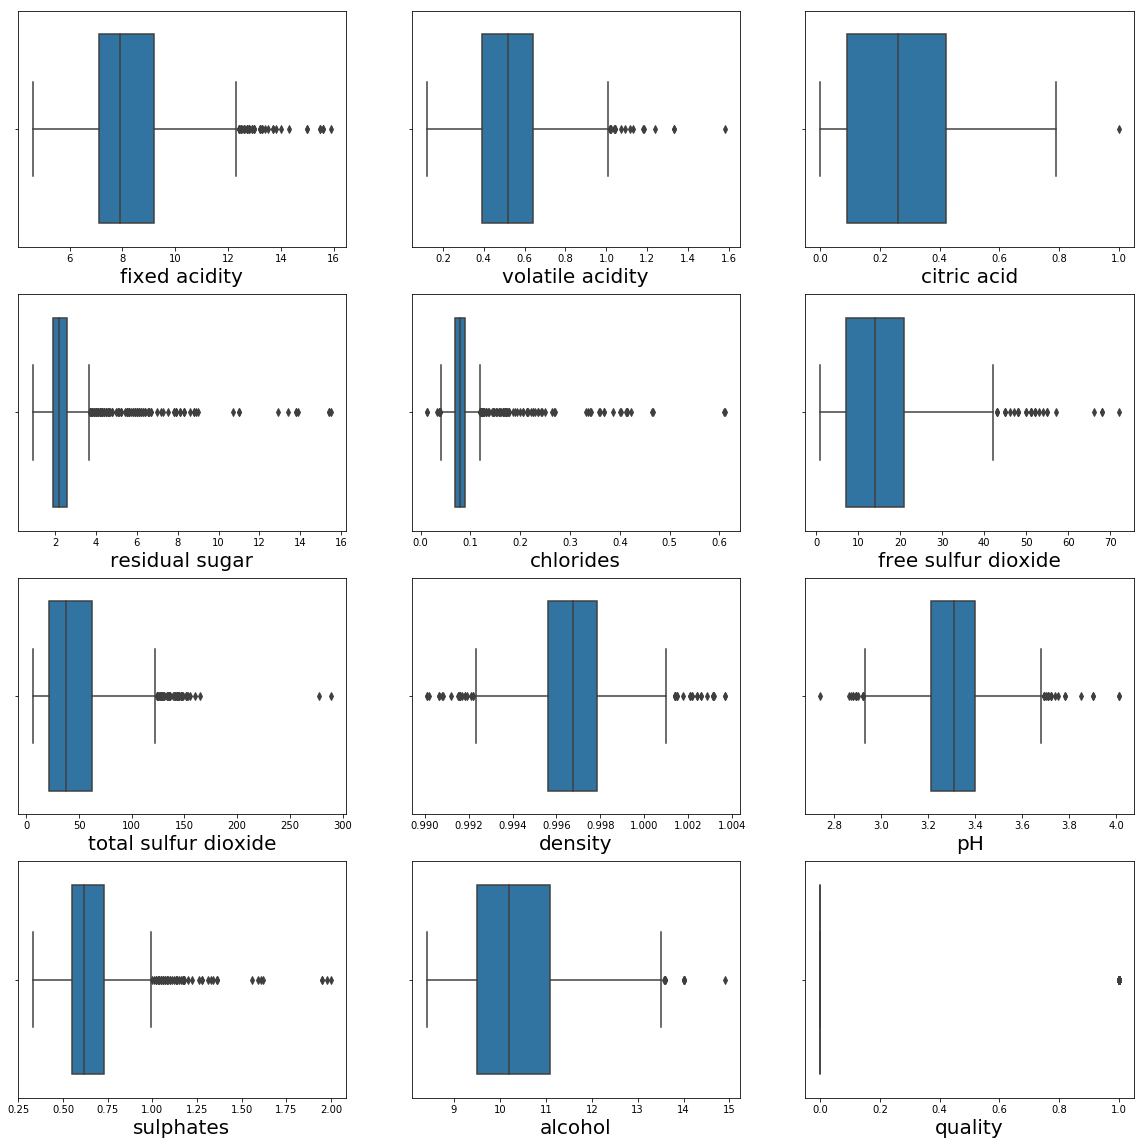

In [636]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

## from the above graph:

#####    Graph1:
    
        In this the 'fixed acidity' column it seems there are some outliers seems like that are greter than 13.
        
#####    Graph2:
    
        In this the 'volatile acidity' column it seems there are some outliers seems like that are greater 1.0.
        
#####    Graph3:
    
        In this the 'citric acid' column it seems there are some outliers seems like for value 1.0.
        
#####    Graph4:
    
        In this the 'residual sugar' column it seems there are some outliers seems like that are greater 4.
        
#####    Graph5:
    
        In this 'chlorides' column it seems there are some outliers seems like that are greater 0.12 & smaller then 0.05.
        
#####    Graph6:
    
        In this column i.e. 'free sulfur dioxide' it seems there are some outliers seems like that are greater 42.
        
#####    Graph7:
    
        In this column i.e. 'total sulfur dioxide' it seems there are some outliers seems like that are greater 120.
        
#####    Graph8:
    
        In this column i.e. density it seems there are some outliers seems like that are greater 1.001 & smaller then 0.992.
        
#####    Graph9:
    
        In this column i.e. 'pH' it seems there are some outliers seems like that are greater 3.7 & smaller then 2.9.
        
#####    Graph 10:
    
        In this column i.e. 'sulphates' it seems there are some outliers seems like that are greater 1.1.
        
#####    Graph 11:
    
        In this column i.e. 'alcohol' it seems there are some outliers seems like that are greater 14.

#### Multi Colinearity

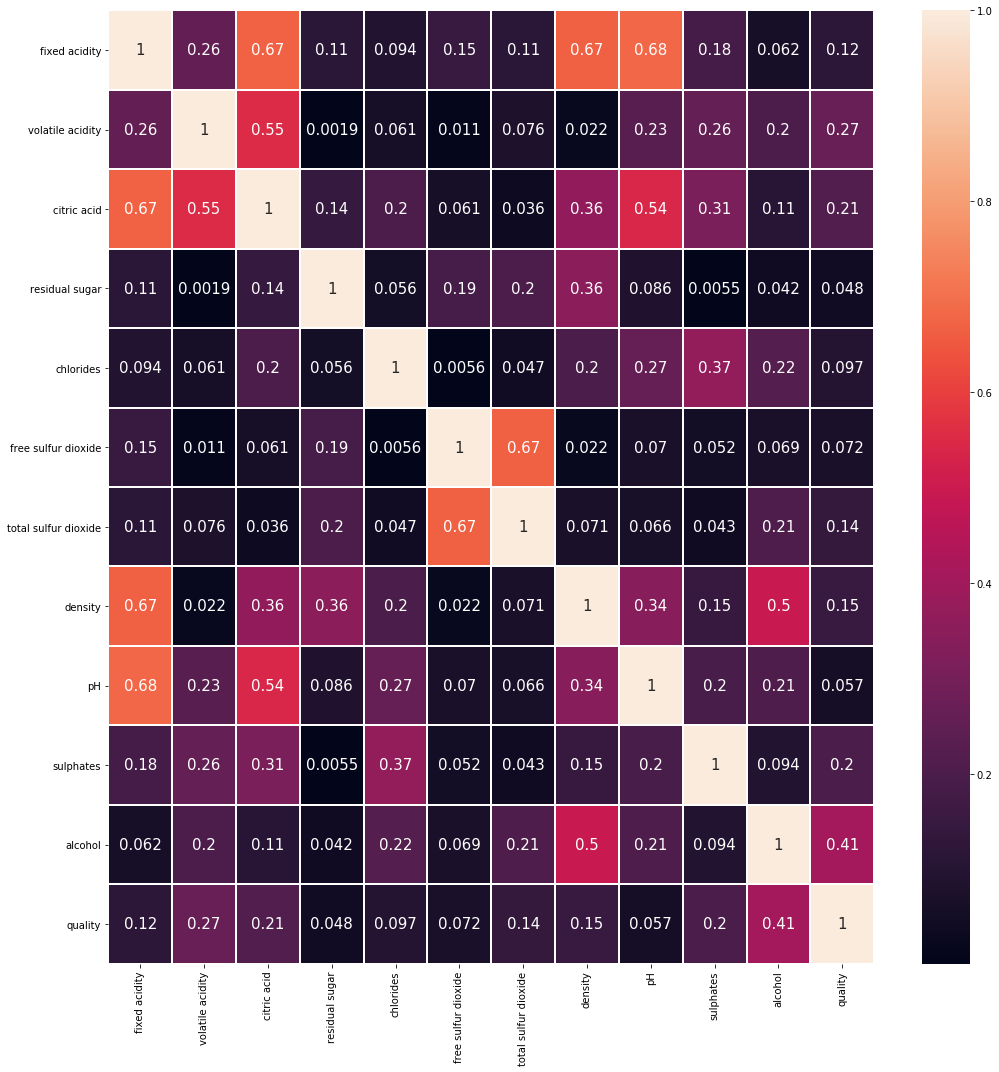

In [637]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

Its seems like there is problem existing with multicolinearity.:

    1. 'fixed acidity' is 67%,67% & 68% colinear with 'citric acid','density' & 'pH'.
    
    2.'free sulfur dioxde' is colinear with 'total sulfur dioxide' i.e. 67%.

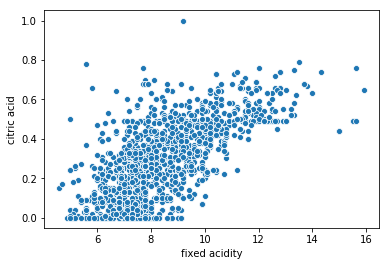

In [638]:
sns.scatterplot(data['fixed acidity'],data['citric acid'])
plt.show()

Here we can see the data is deviated  and linear dependent too.

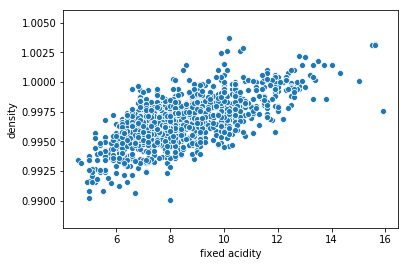

In [639]:
sns.scatterplot(data['fixed acidity'],data['density'])
plt.show()

Here we can see the data is deviated and linar dependent too.

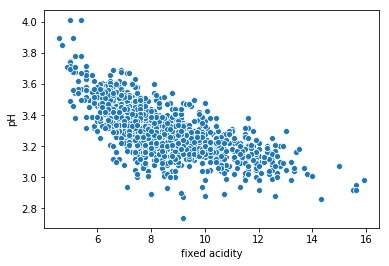

In [640]:
sns.scatterplot(data['fixed acidity'],data['pH'])
plt.show()

Here we can see the data is deviated and linear dependent too.

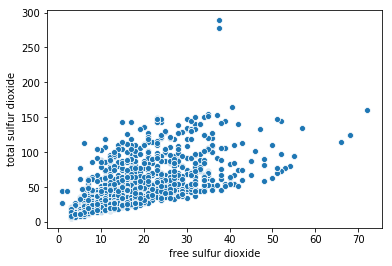

In [641]:
sns.scatterplot(data['free sulfur dioxide'],data['total sulfur dioxide'])
plt.show()

Here we can see the data is deviated. So, no need to removed column between them.

As we have done the analysis part. I conclude that there are outlier in all columns & data is skewed & no multi colinearity exists.

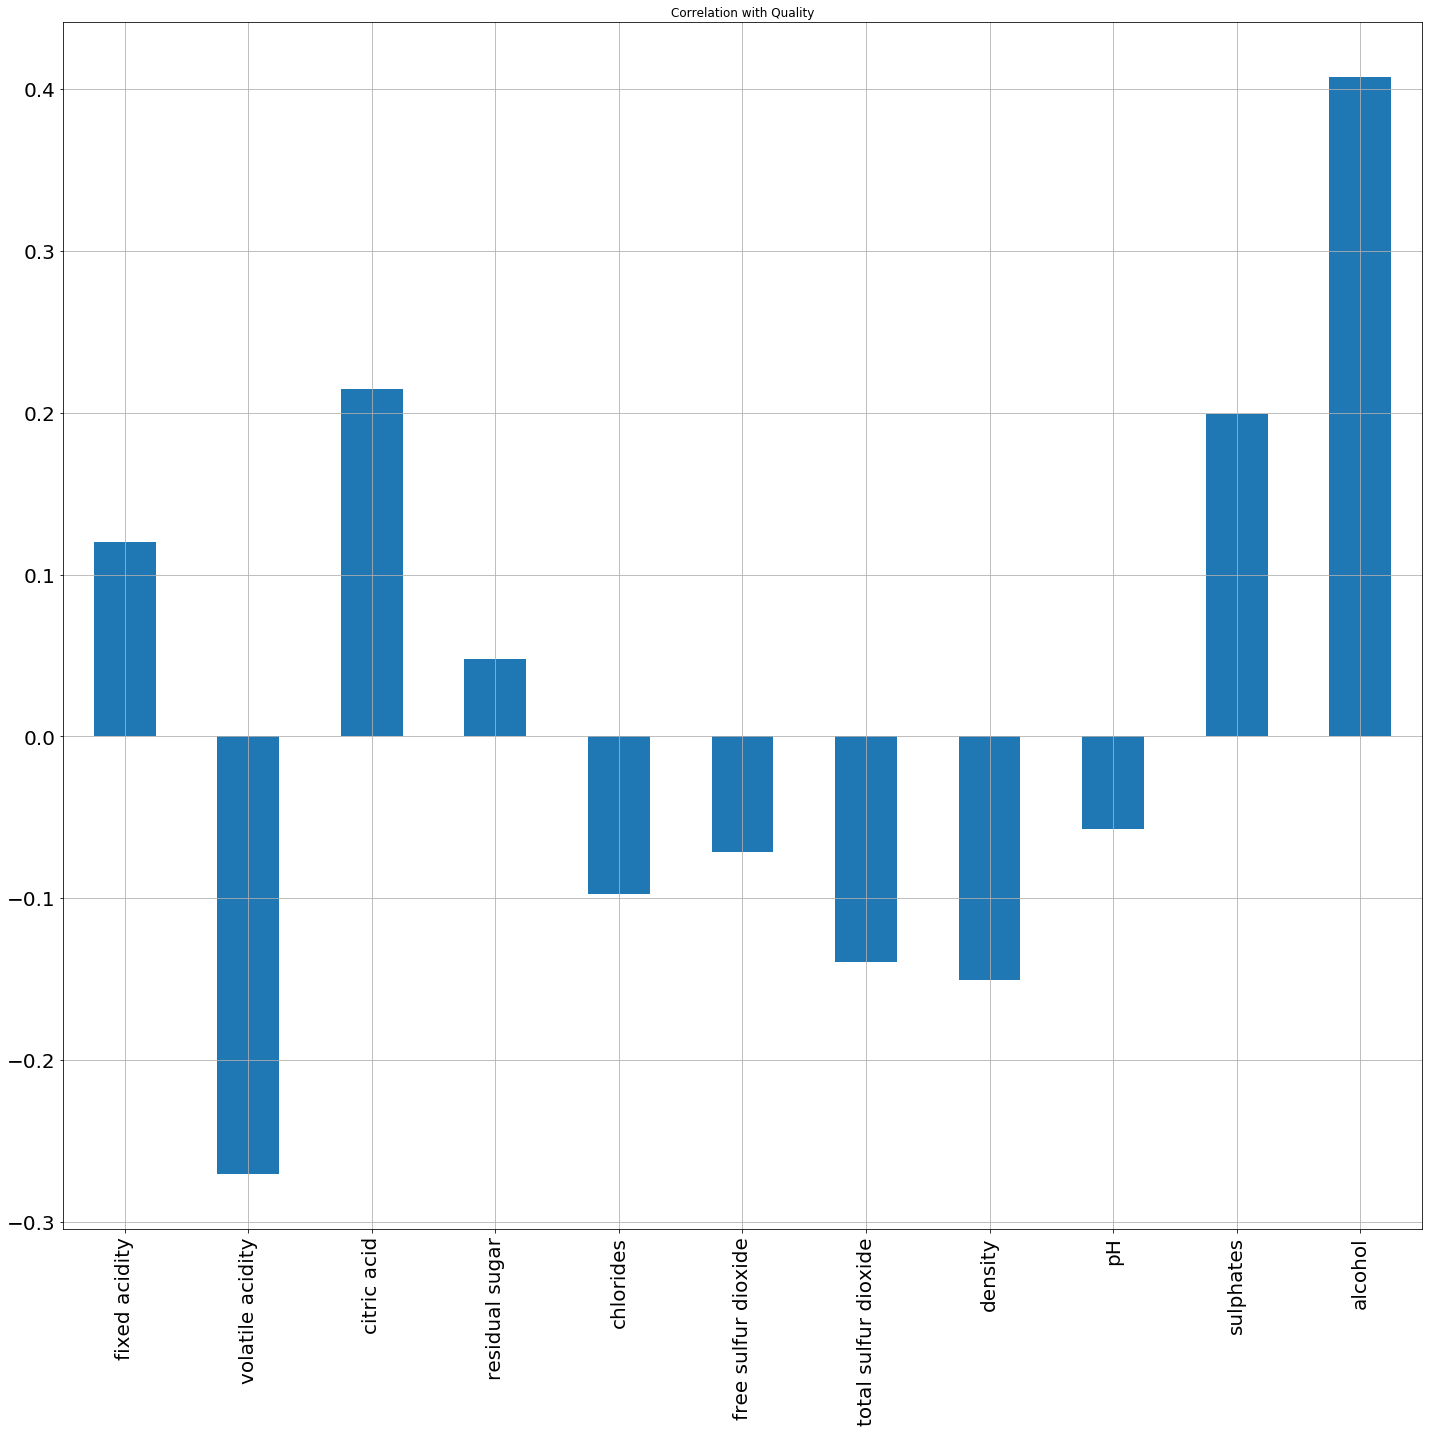

In [642]:
data.drop("quality",axis=1).corrwith(data.quality).plot(kind='bar',grid=True,figsize=(20,20),title='Correlation with Quality',fontsize=20)
plt.tight_layout()

Here we can see the features relations with the target variable. In this graph some features positively corelate with the target variabl & some are negatively correlated.

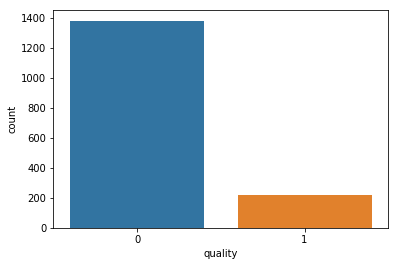

In [643]:
sns.countplot(data['quality'])

here we can data is imbalanced.

In [644]:
data.shape

(1599, 12)

Before cleaning we have 1599 records & 12 columns.

## Data Cleaning

In [645]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

there were some duplicates values in our data that we dropped.

In [646]:
#### Transforming features

In [647]:
data['residual_sugar']=data['residual sugar']
data["total_sulfur_dioxide"]=data['total sulfur dioxide']
data['free_sulfur_dioxide']=data['free sulfur dioxide']
data['volatile_acidity']=data['volatile acidity']

data.drop(columns=['residual sugar','total sulfur dioxide','free sulfur dioxide','volatile acidity'],axis=1,inplace=True)

data['fixed_acidity']=data['fixed acidity']
data['citric_acid']=data['citric acid']
data.drop(columns=['citric acid','fixed acidity'],inplace=True)

data.columns

Index(['chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality',
       'residual_sugar', 'total_sulfur_dioxide', 'free_sulfur_dioxide',
       'volatile_acidity', 'fixed_acidity', 'citric_acid'],
      dtype='object')

In [648]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='quality~chlorides+density+pH+sulphates+alcohol+residual_sugar+total_sulfur_dioxide+free_sulfur_dioxide+volatile_acidity+fixed_acidity+citric_acid',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     39.03
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           2.14e-73
Time:                        16:44:04   Log-Likelihood:                -282.79
No. Observations:                1359   AIC:                             589.6
Df Residuals:                    1347   BIC:                             652.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               34.6360     10.672      3.245      0.001      13.700      55.572
chlorides               -0.6122      0.203     -3.008      0.003      -1.011      -0.213
density                -35.8740     10.890     -3.294      0.001     -57.238     -14.510
pH                       0.0122      0.097      0.126      0.900      -0.177       0.202
sulphates                0.3619      0.058      6.280      0.000       0.249       0.475
alcohol                  0.0771      0.013      5.798      0.000       0.051       0.103
residual_sugar           0.0244      0.008      3.168      0.002       0.009       0.039
total_sulfur_dioxide    -0.0005      0.000     -1.254      0.210      -0.001       0.000
free_sulfur_dioxide     -0.0009      0.001     -0.863      0.388      -0.003       0.001
volatile_acidity        -0.1964      0.059     -3.320      0.001      -0.312      -0.080
fixed_acidity            0.0356      0.013      2.709      0.007       0.010       0.061
citric_acid              0.0339      0.073      0.461      0.645      -0.110       0.178
==============================================================================
Omnibus:                      272.390   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.306
Skew:                           1.262   Prob(JB):                    1.01e-103
Kurtosis:                       4.417   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

citric_acid,free_sulfur_dioxide,total_sulfur_dioxide,pH has pValue greater then 0.05. So we can remove them.

In [649]:
data.drop(columns=['citric_acid','free_sulfur_dioxide','total_sulfur_dioxide','pH'],inplace=True)

In [650]:
df=data.copy()

In [651]:
zscore=zscore(data[['fixed_acidity','volatile_acidity','residual_sugar','chlorides','density','sulphates','alcohol']])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<2).all(axis=1)
data=data[filtered]

here we use 2 thats mean we loose the 95% more data after removing duplicates friom datasets.

Here we take 2 for removing outliers that means we have taken 95% data and lost 5% data and still gettng outliers in some columns.

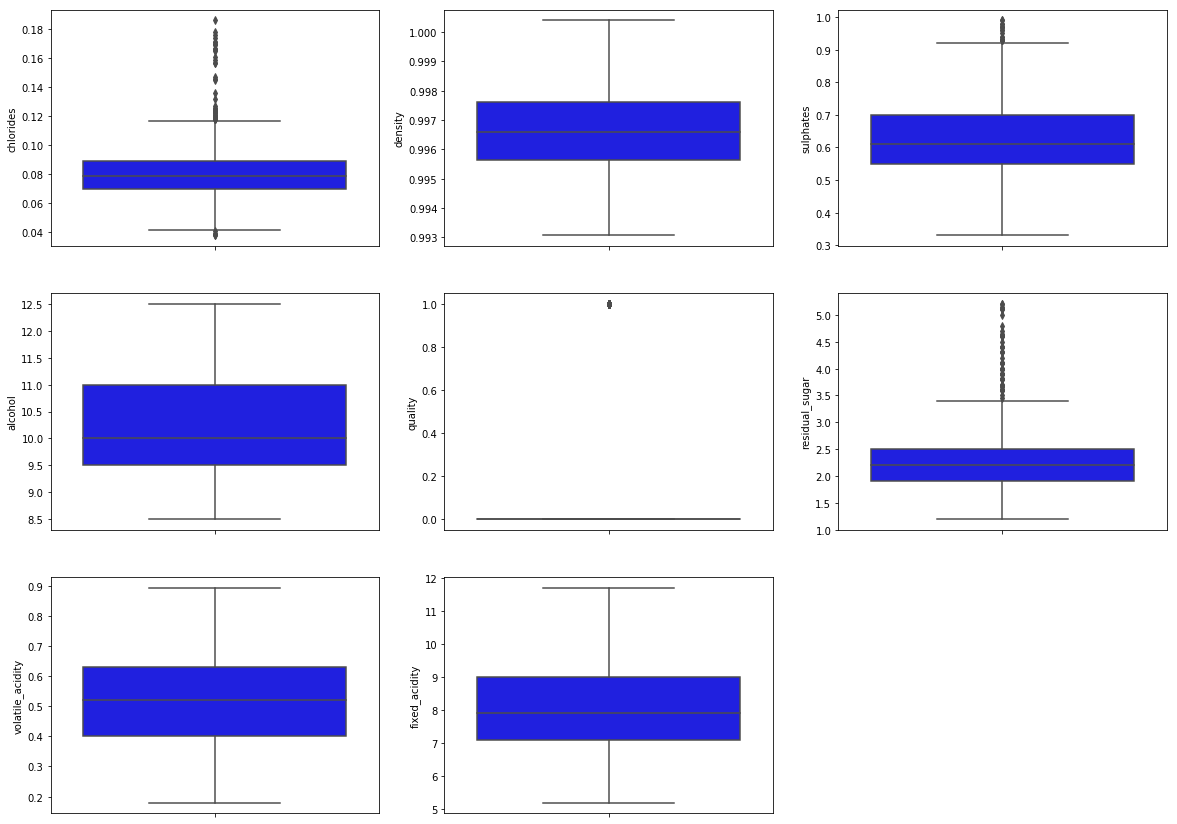

In [652]:
plotn=1
plt.figure(figsize=(20,20))
for col in data:
    if plotn<12:
        ax=plt.subplot(4,3,plotn)
        sns.boxplot(data[col],color='blue',orient='v')
    plotn+=1
plt.show()

there are still some outliers like in columns  'residual sugar', 'chlorides', ,'total sulfur dioxide','sulphates' but they are continous too. Let's see the Statiscal desciption of the data.

In [653]:
data.shape

(1050, 8)

In [654]:
q3=data.quantile(.75)
q1=data.quantile(0.25)
iqr=q3-q1

In [655]:
high_residual_sugar=q3.residual_sugar+1.5*iqr.residual_sugar
index=np.where(data['residual_sugar']>high_residual_sugar)


data.drop(data.index[index],inplace=True)

In [656]:
high_sulphates=q3.sulphates+1.5*iqr.sulphates
index=np.where(data['sulphates']>high_sulphates)


data.drop(data.index[index],inplace=True)

In [657]:
high_sulphates=q3.chlorides+1.5*iqr.chlorides
index=np.where(data['chlorides']>high_sulphates)


data.drop(data.index[index],inplace=True)

In [658]:
loChlo=q1.chlorides-1.5*iqr.chlorides
index=np.where(data['chlorides']<loChlo)


data.drop(data.index[index],inplace=True)

In [659]:
data.shape

(939, 8)

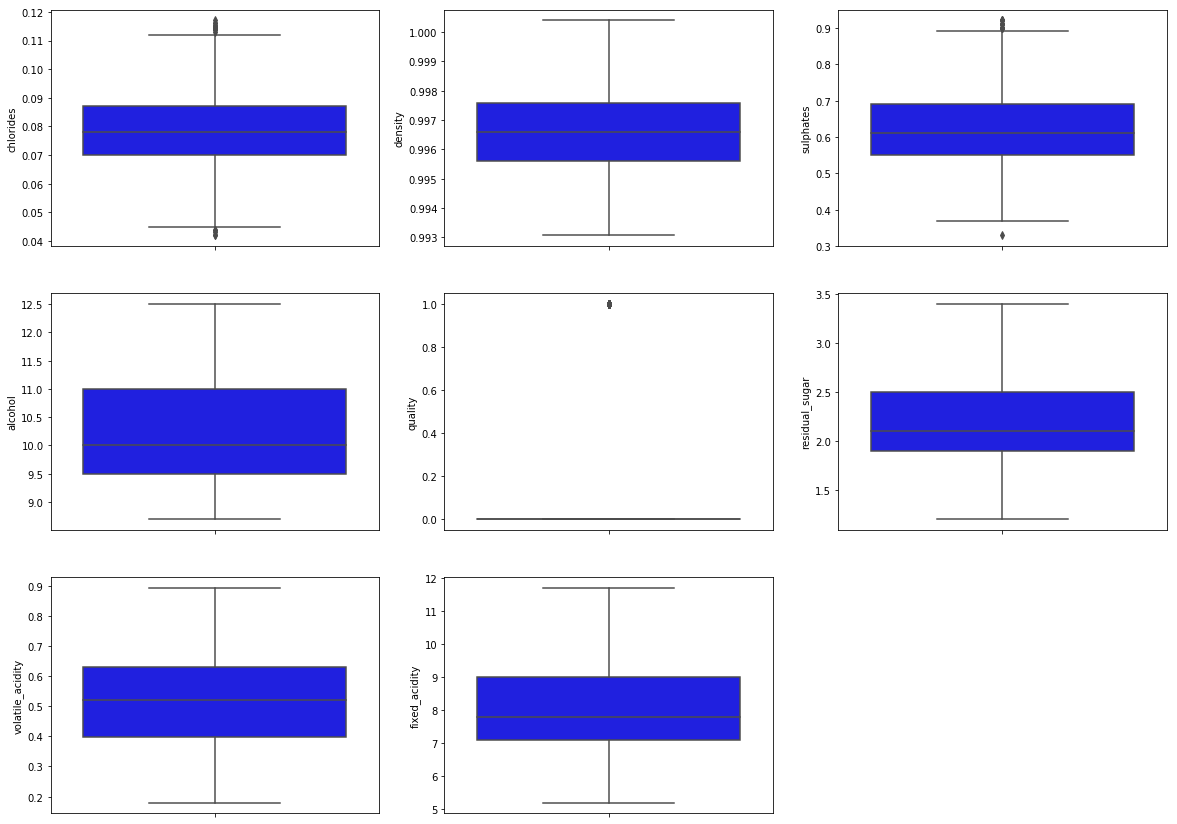

In [660]:
plotn=1
plt.figure(figsize=(20,20))
for col in data:
    if plotn<12:
        ax=plt.subplot(4,3,plotn)
        sns.boxplot(data[col],color='blue',orient='v')
    plotn+=1
plt.show()

In [662]:
data.describe()

,chlorides,density,sulphates,alcohol,quality,residual_sugar,volatile_acidity,fixed_acidity
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,0.078704,0.996592,0.625399,10.272151,0.109691,2.177583,0.517796,8.104260
std,0.013594,0.001442,0.108816,0.896652,0.312671,0.427039,0.155610,1.333632
min,0.042000,0.993060,0.330000,8.700000,0.000000,1.200000,0.180000,5.200000
25%,0.070000,0.995600,0.550000,9.500000,0.000000,1.900000,0.397500,7.100000
50%,0.078000,0.996600,0.610000,10.000000,0.000000,2.100000,0.520000,7.800000
75%,0.087000,0.997590,0.690000,11.000000,0.000000,2.500000,0.630000,9.000000
max,0.117000,1.000400,0.920000,12.500000,1.000000,3.400000,0.895000,11.700000


Its seems that our data is acurate.

In [663]:
data.shape

(939, 8)

### Loss of data

In [664]:
print("Loss of data is:"+str((1599-939)/1599*100)+"%")

Loss of data is:41.275797373358344%


We losted 41% data that had duplicates values & outliers in it.

In [665]:
features=['alcohol','sulphates','residual_sugar','fixed_acidity']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,alcohol,sulphates,residual_sugar,fixed_acidity
0,-1.066378,-0.548101,-0.608749,-0.453795
1,-0.417478,0.601008,1.006704,-0.116943
2,-0.417478,0.340435,0.369723,-0.116943
3,-0.417478,-0.335491,-0.608749,1.966327
5,-1.066378,-0.548101,-0.881379,-0.453795


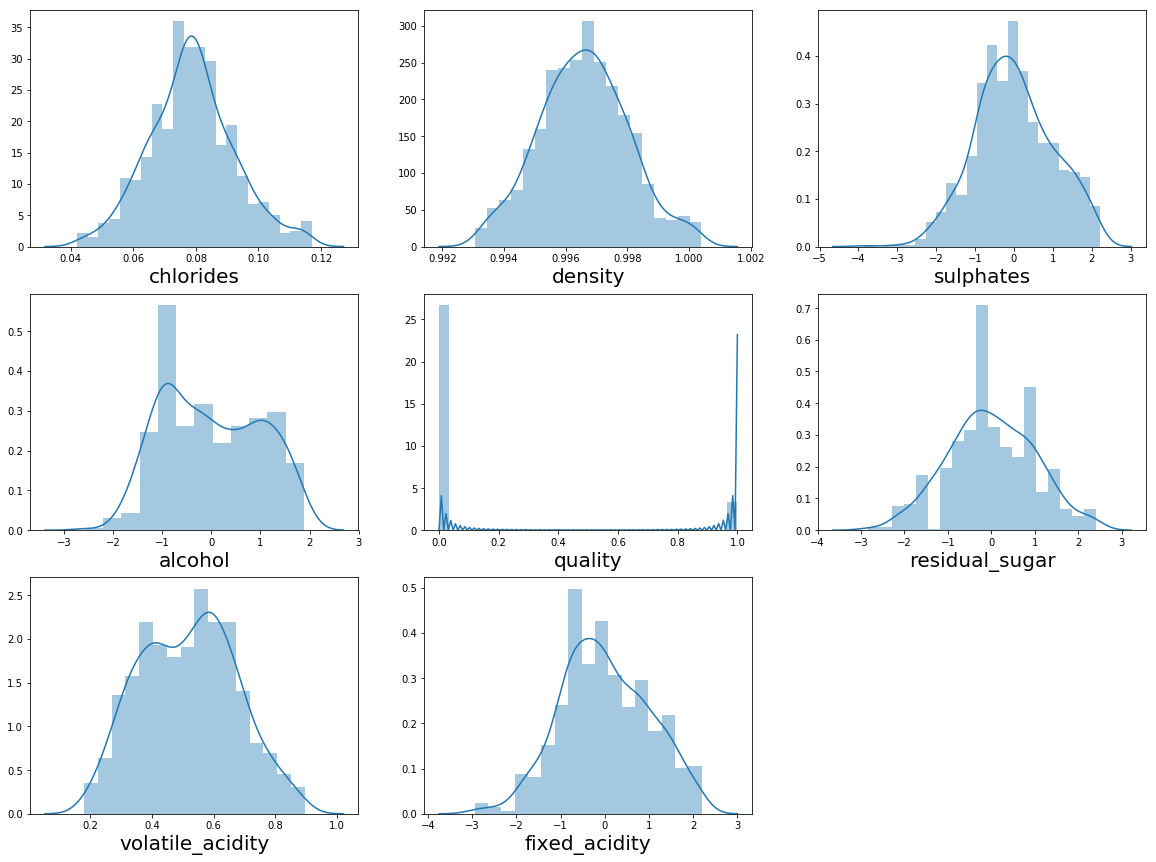

In [666]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Here we can see all the columns are normally distributed now.

In [667]:
data.skew()

chlorides           0.172503
density             0.105469
sulphates           0.016376
alcohol             0.127139
quality             2.501940
residual_sugar      0.004143
volatile_acidity    0.078053
fixed_acidity       0.013601
dtype: float64

Here we can see all the columns are symmetric now.

## Model Deployment

In [668]:
X=data.drop(columns=['quality'],axis=1)
Y=data['quality']

split data into features & labels.

### Normalizing the data

In [669]:
scalar=StandardScaler()

In [670]:
X_=scalar.fit_transform(X)

In [671]:
X_

array([[-0.19900586,  0.83823825, -0.54810062, ..., -0.60874906,
         1.17152962, -0.45379469],
       [ 1.42016035,  0.14448409,  0.60100812, ...,  1.00670441,
         2.32888502, -0.11694347],
       [ 0.97856956,  0.28323493,  0.34043455, ...,  0.36972274,
         1.55731475, -0.11694347],
       ...,
       [ 0.83137264, -1.17364881, -0.33549051, ..., -0.34818829,
         0.52855439, -1.65077908],
       [-1.22938435, -1.0210229 ,  1.22308482, ...,  0.14027365,
         0.20706678, -2.0043796 ],
       [-0.27260432, -0.77820894,  0.84605121, ..., -0.34818829,
         0.81789324, -2.0043796 ]])

#### target variable counplot

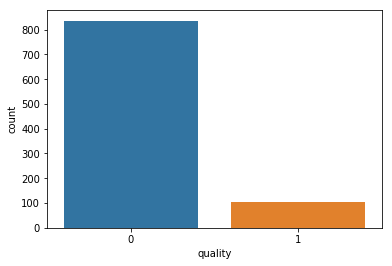

In [672]:
sns.countplot(data.quality)

target variable is imbalanced.

### Balacing Datasets

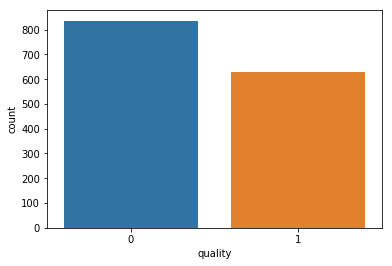

In [673]:
over_sampling=SMOTE(0.75)
X_,Y=over_sampling.fit_resample(X_,Y)

sns.countplot(Y)

Balaned our target variable.

In [718]:
X_.shape

(1463, 7)

After balancing we have now 1463 records.

In [674]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [678]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost,Bagging]

In [713]:
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(1,150):
        X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 89.76109215017065 of model LogisticRegression() at random state 84


Confusion Matrix:

 [[154  16]
 [ 21 102]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       170
           1       0.86      0.83      0.85       123

    accuracy                           0.87       293
   macro avg       0.87      0.87      0.87       293
weighted avg       0.87      0.87      0.87       293

DecisionTreeClassifier():
---------------------------
---------------------------

The highest accuracy is 91.12627986348123 of model DecisionTreeClassifier() at random state 48


Confusion Matrix:

 [[150  20]
 [ 13 110]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       170
           1       0.85      0.89      0.8

Here we can see the highest model accuracy of each moel with their Random state,Confusion Matrix,Classification Report.

In [717]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,20):
        cvS=cross_val_score(model,X_,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7784838868830033 at k-fold::2

Mean CV Score of model LogisticRegression():: 0.8140449501239887 at k-fold::3

Mean CV Score of model LogisticRegression():: 0.813397335129875 at k-fold::4

Mean CV Score of model LogisticRegression():: 0.8188040581607368 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.8222750680249161 at k-fold::6

Mean CV Score of model LogisticRegression():: 0.8284347231715653 at k-fold::7

Mean CV Score of model LogisticRegression():: 0.8291298865069356 at k-fold::8

Mean CV Score of model LogisticRegression():: 0.8324034099994109 at k-fold::9

Mean CV Score of model LogisticRegression():: 0.8338272295219458 at k-fold::10

Mean CV Score of model LogisticRegression():: 0.8339029391660969 at k-fold::11

Mean CV Score of model LogisticRegression():: 0.8332260759608001 at k-fold::12

Mean CV Score of model LogisticRegression():: 0.835079743265584 at k-fold::13



Mean CV Score of model BaggingClassifier():: 0.8919904948280681 at k-fold::10

Mean CV Score of model BaggingClassifier():: 0.8913192071086807 at k-fold::11

Mean CV Score of model BaggingClassifier():: 0.9029151424829517 at k-fold::12

Mean CV Score of model BaggingClassifier():: 0.9007828454731109 at k-fold::13

Mean CV Score of model BaggingClassifier():: 0.8871206174777605 at k-fold::14

Mean CV Score of model BaggingClassifier():: 0.9022021179605865 at k-fold::15

Mean CV Score of model BaggingClassifier():: 0.9035997969421883 at k-fold::16

Mean CV Score of model BaggingClassifier():: 0.9043115241284966 at k-fold::17

Mean CV Score of model BaggingClassifier():: 0.8988089263608684 at k-fold::18

Mean CV Score of model BaggingClassifier():: 0.8967874231032125 at k-fold::19



In [719]:
CVmodel

{'LogisticRegression()': [0.8386876281613125],
 'DecisionTreeClassifier()': [0.8734062697243846],
 'RandomForestClassifier()': [0.9241316414296272],
 'KNeighborsClassifier()': [0.8769360189946066],
 'AdaBoostClassifier()': [0.8536012343081563],
 'BaggingClassifier()': [0.9063175877536251]}

here we can see the maximun CV score of each model

In [720]:


m=list(CVmodel.keys())

print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::5.89
DecisionTreeClassifier()::3.79
RandomForestClassifier()::4.17
KNeighborsClassifier()::5.48
AdaBoostClassifier()::3.38
BaggingClassifier()::3.91


here for model AdaBoostClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 3.38 .

In [721]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=84)

here we take RandonState 84 because it is the best to use for DecisionTreeClassifier.

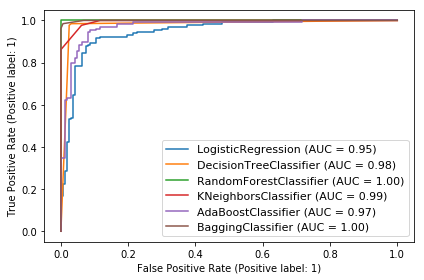

In [722]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(DecisionTree,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(knn,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

In [ ]:
AdaBoostClassifier()

## Hyperparameter Tuning

In [731]:
params={"n_estimators":[43,45,47],'learning_rate':[0.30,0.40,0.45],"random_state":[84,168]}

In [732]:
grid=GridSearchCV(estimator=AdaBoost,cv=15,param_grid=params,n_jobs=-1)

In [733]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=15, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4, 0.45],
                         'n_estimators': [43, 45, 47],
                         'random_state': [84, 168]})

In [734]:
grid.best_params_

{'learning_rate': 0.4, 'n_estimators': 45, 'random_state': 84}

In [735]:
AdaBoost=AdaBoostClassifier(learning_rate=0.4,n_estimators=45, random_state=84,)
AdaBoost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=45, random_state=84)

In [736]:
Y_pred=knn.predict(X_test)

In [737]:
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))


print("Accuracy of DecisionTreeClassifier Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")


print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for DecisionTreeClassifier model:\n",classification_report(Y_test,Y_pred))



Predicted values:
 [0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1
 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1]


The dataframe for the actual & predicted values:

       Actual data  Predicted
396             0          0
964             1          1
383             0          0
1102            1          1
306             0          0
26              0          0
1393            1          1
985             1          1
145             0          0
1160            1          1
48          

Earlier our model accuracy was 88% now its 94 %.

## Saving Model

In [738]:
pickle.dump(AdaBoost,open("Wine_model.pickle","wb"))